Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Helen Ng"

# Assignment 3 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


Complete the following:

**Data Preparation**

**Question 1** _(3 points)_
* Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

**Question 2** _(3 points)
* Create a new column which captures the age of the car as 'new' or 'old'.

**Question 3** _(3 points)
* Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

**Exploratory Analysis**

**Question 4** _(3 points)_
* Conduct exploratory analysis for the categorical variables. What are you findings?

**Question 5** _(10 points)_
* Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?


**Regression Model**

**Question 6** _(1 point)_
* Based on the insights identified, state a hypothesis which you can test with a regression model.  

**Question 7** _(5 points)_
* Build a linear regression model based on your hypothesis. Interpret the results.

**Question 8** _(2 points)_
* How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [1]:
# 1 Create dummy variables for the Fuel_Type, Transmission, and Seller_Type variables

import pandas as pd
import numpy as np
cars_df = pd.read_csv('C:/Users/nghel/Downloads/car_data.csv')

cars_df.info()
cars_df.head()
cars_df.describe()

# Creating dummy variables for Fuel_Type
fuel_dummies = pd.get_dummies(cars_df['Fuel_Type'], prefix='Fuel')
print("\nFuel_Type Dummies:")
print(fuel_dummies.head())

# Creating dummy variables for Seller_Type
seller_dummies = pd.get_dummies(cars_df['Seller_Type'], prefix = 'Seller')
print("\nSeller_Type Dummies:")
print(seller_dummies.head())

# Creating dummy variables for Transmission
transmission_dummies = pd.get_dummies(cars_df['Transmission'], prefix = 'Transmission')
print("\nTranmission Dummies:")
print(transmission_dummies.head())

# Combining all dummy variables with original dataframe
df_manual = pd.concat([cars_df, fuel_dummies, seller_dummies, transmission_dummies], axis=1)

print(df_manual.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Fuel_Type Dummies:
   Fuel_CNG  Fuel_Diesel  Fuel_Petrol
0     False        False         True
1     False         True        False
2     False        False         True
3     False        False         True
4     False         True        False

Seller_Type Dummies:
   Seller_Dealer  Seller_Individual
0           True              False
1      

In [15]:
# 2 Create a new column which captures the age of the car as 'new' or 'old'

import pandas as pd
import numpy as np
cars_df = pd.read_csv('C:/Users/nghel/Downloads/car_data.csv')

print("Original Dataset:")
print(cars_df[['Car_Name', 'Year']].head(5))
print("="*80)

# Checking the range of years in the dataset
print("\nYear range in dataset:")
print(f"Minimum Year: {cars_df['Year'].min()}")
print(f"Maximum Year: {cars_df['Year'].max()}")

# Calculate car age 
current_year = 2025
cars_df['Car_Age'] = current_year - cars_df['Year']

print(f"\nCar Age range: {cars_df['Car_Age'].min()} to {cars_df['Car_Age'].max()} years")
print(f"Mean Car Age: {cars_df['Car_Age'].mean():.2f} years")
print(f"Median Car Age: {cars_df['Car_Age'].median():.2f} years")

# Use a fixed threshold (e.g. 5 years) to determine old/new
print("\n" + "="*80)
print("Using 5 years as threshold")
print("="*80)

cars_df['Age_Category_5yr'] = cars_df['Car_Age'].apply(lambda x: 'new' if x <= 5 else 'old')

print("\nDataset with 5-year threshold:")
print(cars_df[['Car_Name', 'Year', 'Car_Age', 'Age_Category_5yr']].head(10))



Original Dataset:
  Car_Name  Year
0     ritz  2014
1      sx4  2013
2     ciaz  2017
3  wagon r  2011
4    swift  2014

Year range in dataset:
Minimum Year: 2003
Maximum Year: 2018

Car Age range: 7 to 22 years
Mean Car Age: 11.37 years
Median Car Age: 11.00 years

Using 5 years as threshold

Dataset with 5-year threshold:
        Car_Name  Year  Car_Age Age_Category_5yr
0           ritz  2014       11              old
1            sx4  2013       12              old
2           ciaz  2017        8              old
3        wagon r  2011       14              old
4          swift  2014       11              old
5  vitara brezza  2018        7              old
6           ciaz  2015       10              old
7        s cross  2015       10              old
8           ciaz  2016        9              old
9           ciaz  2015       10              old


In [21]:
# 3 Scale the Kms_Driven, Selling_Price, and Present_Price variables 
import pandas as pd
import numpy as np
cars_df = pd.read_csv('C:/Users/nghel/Downloads/car_data.csv')

print("="*80)
print("Original Data - Before Scaling")
print("="*80)
print("\nOriginal values (first 5 rows):")
print(cars_df[['Car_Name', 'Kms_Driven', 'Selling_Price', 'Present_Price']].head(5))

print("\n" + "="*80)
print("Current Scales")
print("="*80)

print(f"""
Current Scales: 
- Kms_Driven: Actual kilometers (range:{cars_df['Kms_Driven'].min():,} to {cars_df['Kms_Driven'].max():,})
- Selling_Price: In Lakhs (range: {cars_df['Selling_Price'].min()} to {cars_df['Selling_Price'].max()})
- Present_Price: In Lakhs (range: {cars_df['Present_Price'].min()} to {cars_df['Present_Price'].max()})

The prices are already in the same scale. Kms_Driven needs to be scaled to match 
""") 

print("="*80)
print("Scaling Kms_Driven to Thousands")
print("="*80)

# Scaling Kms_Driven from actual km to thousands of km
cars_df['Kms_Driven_Thousands'] = cars_df['Kms_Driven']/1000

print("\nAfter scaling Kms_Driven to thousands:")
print(cars_df[['Car_Name', 'Kms_Driven', 'Kms_Driven_Thousands', 'Selling_Price', 'Present_Price']].head(5))


Original Data - Before Scaling

Original values (first 5 rows):
  Car_Name  Kms_Driven  Selling_Price  Present_Price
0     ritz       27000           3.35           5.59
1      sx4       43000           4.75           9.54
2     ciaz        6900           7.25           9.85
3  wagon r        5200           2.85           4.15
4    swift       42450           4.60           6.87

Current Scales

Current Scales: 
- Kms_Driven: Actual kilometers (range:500 to 500,000)
- Selling_Price: In Lakhs (range: 0.1 to 35.0)
- Present_Price: In Lakhs (range: 0.32 to 92.6)

The prices are already in the same scale. Kms_Driven needs to be scaled to match 

Scaling Kms_Driven to Thousands

After scaling Kms_Driven to thousands:
  Car_Name  Kms_Driven  Kms_Driven_Thousands  Selling_Price  Present_Price
0     ritz       27000                 27.00           3.35           5.59
1      sx4       43000                 43.00           4.75           9.54
2     ciaz        6900                  6.90         

Exploratory Analysis of Categorical Variables

Categorical Variables: ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
Total records: 301

1. Frequency Distribution

Fuel_Type:
           Count  Percentage
Fuel_Type                   
Petrol       239       79.40
Diesel        60       19.93
CNG            2        0.66

Seller_Type:
             Count  Percentage
Seller_Type                   
Dealer         195       64.78
Individual     106       35.22

Transmission:
              Count  Percentage
Transmission                   
Manual          261       86.71
Automatic        40       13.29

Owner:
       Count  Percentage
Owner                   
0        290       96.35
1         10        3.32
3          1        0.33

2. Cross-Tablulation Analysis

---Fuel_Type vs Seller_Type ---
Seller_Type  Dealer  Individual  All
Fuel_Type                           
CNG               2           0    2
Diesel           59           1   60
Petrol          134         105  239
All       

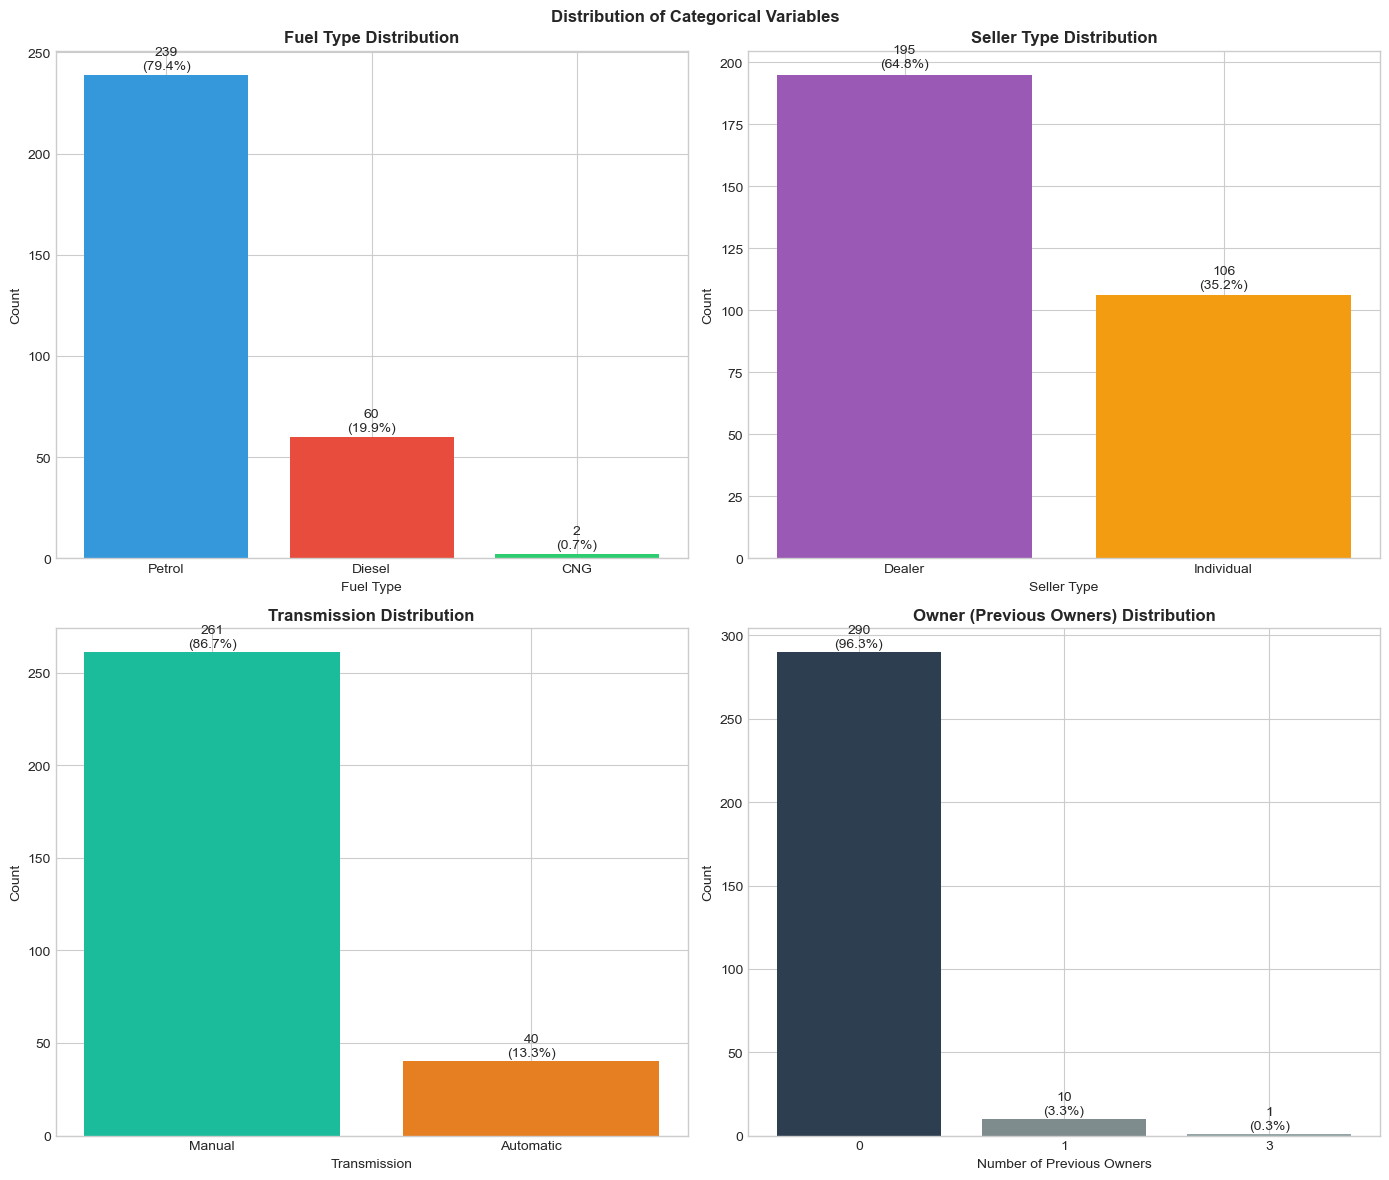

C:\Users\nghel\AppData\Local\Temp\ipykernel_24044\967330055.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cars_df, x='Fuel_Type', y='Selling_Price', ax=axes[0,0], palette='Set2')
C:\Users\nghel\AppData\Local\Temp\ipykernel_24044\967330055.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cars_df, x = 'Seller_Type', y='Selling_Price', ax=axes[0,1], palette='Set2')
C:\Users\nghel\AppData\Local\Temp\ipykernel_24044\967330055.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cars_df, x='Transmission', y='Selling_

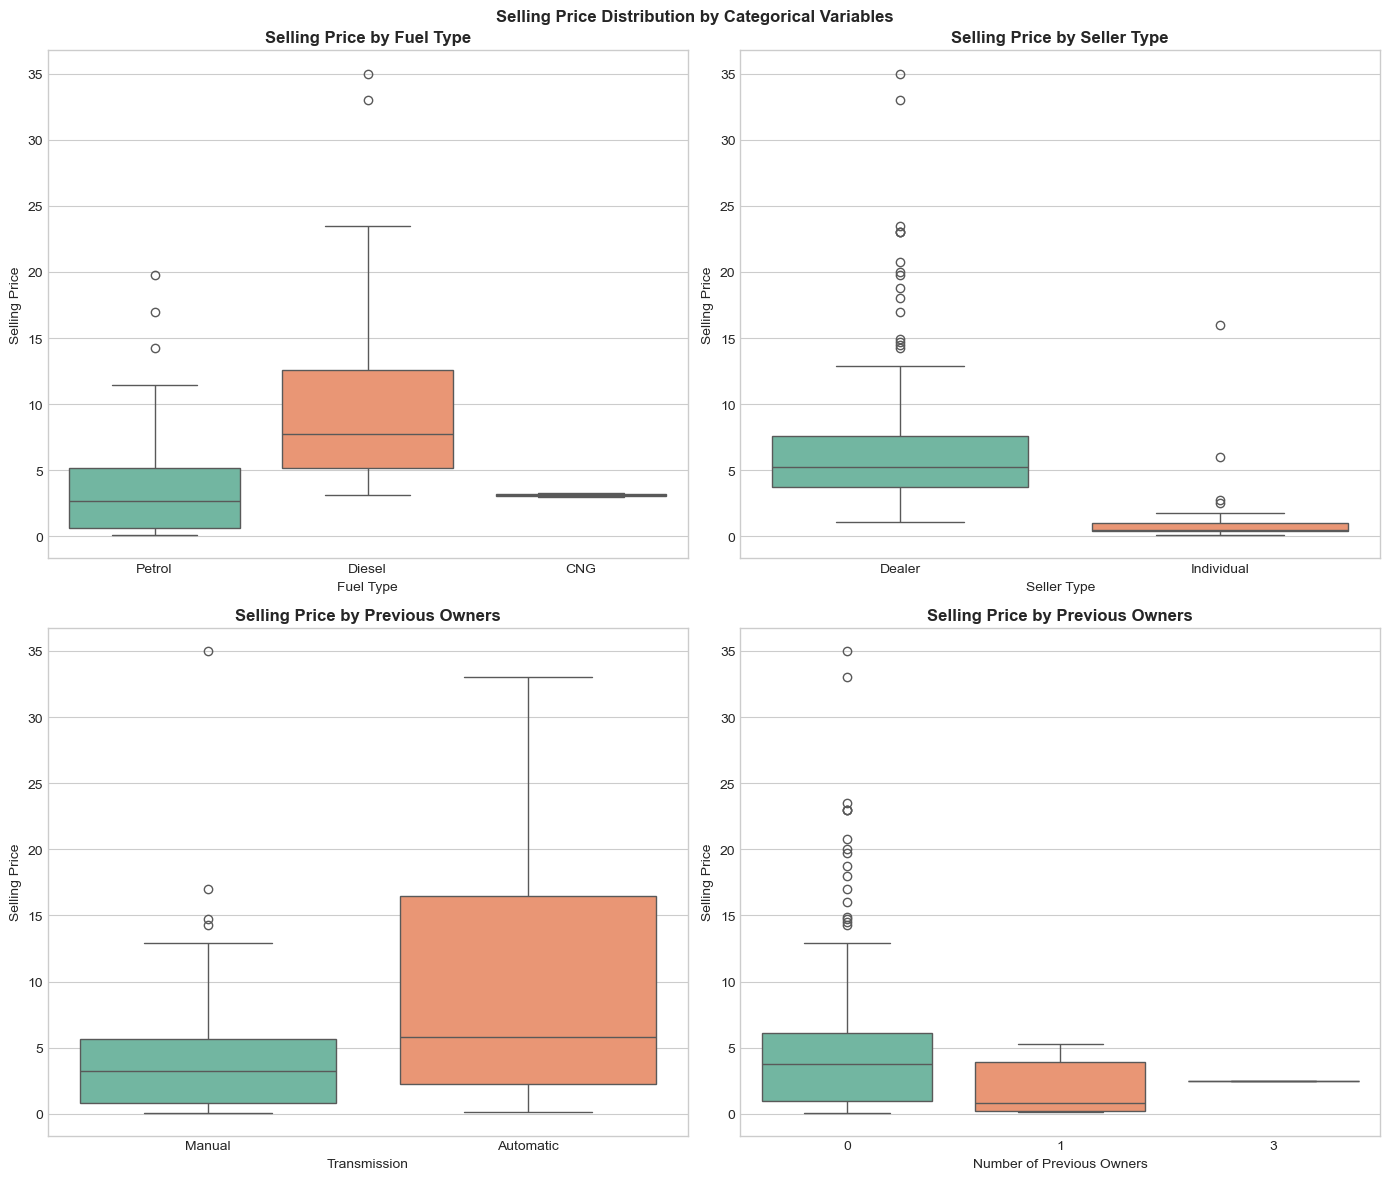

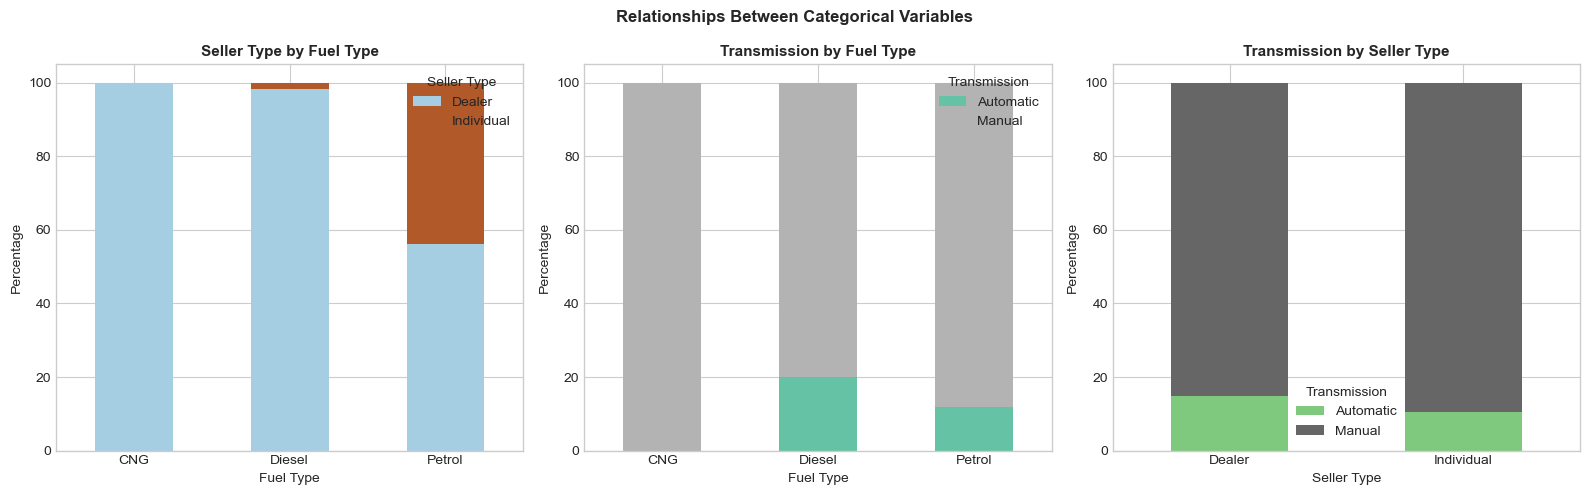

In [85]:
# 4 Conduct exploratory analysis for the categorical variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cars_df = pd.read_csv('C:/Users/nghel/Downloads/car_data.csv')

# Setting style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("="*80)
print("Exploratory Analysis of Categorical Variables")
print("="*80)

# Identifying categorical variables 
categorical_vars = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
print(f"\nCategorical Variables: {categorical_vars}")
print(f"Total records: {len(cars_df)}")

# 1. Frequency Distribution
print("\n" + "="*80)
print("1. Frequency Distribution")
print("="*80)

for var in categorical_vars:
    print(f"\n{var}:")
    freq = cars_df[var].value_counts()
    pct = cars_df[var].value_counts(normalize = True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': pct.round(2)})
    print(summary)

# 2. Cross-Tabulation Analysis
print(f"\n" + "="*80)
print("2. Cross-Tablulation Analysis")
print("="*80)

# Fuel_Type vs. Seller_Type
print("\n---Fuel_Type vs Seller_Type ---")
cross1 = pd.crosstab(cars_df['Fuel_Type'], cars_df['Seller_Type'], margins=True)
print(cross1)

# Fuel_Type vs Transmission
print("\n---Fuel_Type vs Transmission ---")
cross2 = pd.crosstab(cars_df['Fuel_Type'], cars_df['Transmission'], margins=True)
print(cross2)

# Seller_Type vs Transmission
print("\n---Seller_Type vs Transmission---")
cross3 = pd.crosstab(cars_df['Seller_Type'], cars_df['Transmission'], margins=True)
print(cross3)

# 3. Categorical variables vs Selling Price
print("\n" + "="*80)
print("3. Selling Price by Categorical Variables")
print("="*80)

for var in categorical_vars:
    print(f"\n---Selling Price by {var} ---")
    group_stats = cars_df.groupby(var)['Selling_Price'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    group_stats = group_stats.round(2)
    print(group_stats)

# 4. Categorical Variables vs KMs Driven
print("\n" + "="*80)
print("4. KMs Driven by Categorical Variables")
print("="*80)

for var in categorical_vars:
    print(f"\n---KMs Driven by {var} ---")
    group_stats = cars_df.groupby(var)['Kms_Driven'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    group_stats = group_stats.round(2)
    print(group_stats)

# 5. Categorical Variables vs Car Age
print("\n" + "="*80)
print("5. Car Age by Categorical Variables")
print("="*80)

cars_df['Car_Age'] = 2025 - cars_df['Year']

for var in categorical_vars:
    print(f"\n--- Car Age by {var} ---")
    group_stats = cars_df.groupby(var)['Car_Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    group_stats = group_stats.round(2)
    print(group_stats)

# Creating Visualizations 
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Distribution of Categorical Variables', fontsize = 12, fontweight = 'bold')

# Plot 1: Fuel Type Distribution
ax1 = axes[0, 0]
fuel_counts = cars_df['Fuel_Type'].value_counts()
bars1 = ax1.bar(fuel_counts.index, fuel_counts.values, color=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_title('Fuel Type Distribution', fontsize = 12, fontweight = 'bold')
ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Count')
for bar, count in zip(bars1, fuel_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
             f'{count}\n({count/len(cars_df)*100:.1f}%)', ha = 'center', fontsize = 10)

# Plot 2: Seller Type Distribution
ax2 = axes [0,1]
seller_counts = cars_df['Seller_Type'].value_counts()
bars2 = ax2.bar(seller_counts.index, seller_counts.values, color =['#9b59b6', '#f39c12'])
ax2.set_title('Seller Type Distribution', fontsize = 12, fontweight = 'bold')
ax2.set_xlabel('Seller Type')
ax2.set_ylabel('Count')
for bar, count in zip(bars2, seller_counts.values):
      ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, 
             f'{count}\n({count/len(cars_df)*100:.1f}%)', ha='center', fontsize=10)

# Plot 3: Transmission Distribution
ax3 = axes[1,0]
trans_counts = cars_df['Transmission'].value_counts()
bars3 = ax3.bar(trans_counts.index, trans_counts.values, color = ['#1abc9c', '#e67e22'])
ax3.set_title('Transmission Distribution', fontsize = 12, fontweight = 'bold')
ax3.set_xlabel('Transmission')
ax3.set_ylabel('Count')
for bar, count in zip(bars3, trans_counts.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, 
        f'{count}\n({count/len(cars_df)*100:.1f}%)', ha='center', fontsize=10)

# Plot 4: Owner Distribution
ax4 = axes[1,1]
owner_counts = cars_df['Owner'].value_counts().sort_index()
bars4 = ax4.bar(owner_counts.index.astype(str), owner_counts.values, color = ['#2c3e50', '#7f8c8d', '#95a5a6', '#bdc3c7'])
ax4.set_title('Owner (Previous Owners) Distribution', fontsize = 12, fontweight = 'bold')
ax4.set_xlabel('Number of Previous Owners')
ax4.set_ylabel('Count')
for bar, count in zip(bars4, owner_counts.values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, 
             f'{count}\n({count/len(cars_df)*100:.1f}%)', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Boxplots: Selling Price by Categorical Variables
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Selling Price Distribution by Categorical Variables', fontsize=12, fontweight='bold')

# Boxplot 1: Selling Price by Fuel Type
sns.boxplot(data = cars_df, x='Fuel_Type', y='Selling_Price', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Selling Price by Fuel Type', fontsize = 12, fontweight = 'bold')
axes[0,0].set_xlabel('Fuel Type')
axes[0,0].set_ylabel('Selling Price')

# Boxplot 2: Selling Price by Seller Type
sns.boxplot(data=cars_df, x = 'Seller_Type', y='Selling_Price', ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Selling Price by Seller Type', fontsize = 12, fontweight = 'bold')
axes[0,1].set_xlabel('Seller Type')
axes[0,1].set_ylabel('Selling Price')

# Boxplot 3: Selling Price by Transmission
sns.boxplot(data=cars_df, x='Transmission', y='Selling_Price', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Selling Price by Previous Owners', fontsize = 12, fontweight = 'bold')
axes[1,0].set_xlabel('Transmission')
axes[1,0].set_ylabel('Selling Price')

# Boxplot 4: Selling Price by Owner
sns.boxplot(data=cars_df, x='Owner', y='Selling_Price', ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Selling Price by Previous Owners', fontsize = 12, fontweight = 'bold')
axes[1,1].set_xlabel('Number of Previous Owners')
axes[1,1].set_ylabel('Selling Price')

plt.tight_layout()
plt.show()

# Stacked Bar Chart: Relationships between Categorical Variables
fig, axes = plt.subplots(1, 3, figsize = (16,5))
fig.suptitle('Relationships Between Categorical Variables', fontsize = 12, fontweight = 'bold')

# Fuel Type vs Seller Type
cross1_pct = pd.crosstab(cars_df['Fuel_Type'], cars_df['Seller_Type'], normalize='index')*100
cross1_pct.plot(kind='bar', stacked=True, ax=axes[0], colormap='Paired')
axes[0].set_title('Seller Type by Fuel Type', fontsize = 11, fontweight = 'bold')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Seller Type')
axes[0].tick_params(axis='x', rotation = 0)

# Fuel Type vs Transmission
cross2_pct = pd.crosstab(cars_df['Fuel_Type'], cars_df['Transmission'], normalize='index')*100
cross2_pct.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2')
axes[1].set_title('Transmission by Fuel Type', fontsize = 11, fontweight='bold')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Transmission')
axes[1].tick_params(axis='x', rotation=0)

# Seller Type vs Transmission 
cross3_pct = pd.crosstab(cars_df['Seller_Type'], cars_df['Transmission'], normalize='index')*100
cross3_pct.plot(kind='bar', stacked=True, ax=axes[2], colormap='Accent')
axes[2].set_title('Transmission by Seller Type', fontsize = 11, fontweight = 'bold')
axes[2].set_xlabel('Seller Type')
axes[2].set_ylabel('Percentage')
axes[2].legend(title='Transmission')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# 4. Key Findings

# 1) Fuel Type  
# petrol vehicles dominates dataset (79.4% of vehicles)
# diesel vehicles have a higher average selling price (10.28) compared to Petrol (3.26)
# CNG vehicles are very rare (only 2 in dataset)

# 2) Seller Type
# Dealers account for 64.8% of sales
# Individual sellers make up 35.2%
# Dealer cars have a higher average price (6.54) compared to Individual (1.15)
# Suggests that dealers handle more expensive/premium vehicles

# 3) Transmission 
# Manual transmission is dominant - 86.7%
# Automatic transmission only 13.3%
# Automatic vehicles have significantly higher average price (11.48) vs Manual (3.61)

# 4) Owner (Previous Owners)
# Most vehicles (90.7%) have zero previous owners
# 8.6% of vehicles have 1 previous owner
# Only 0.7% have 3 previous owners
# Vehicles with zero previous owners have highest average price (4.92)

# 5) Cross-Tabulation Results
# All CNG vehicles are sold by dealers with manual transmission
# Individual sellers predmoninantly sold Petrol vehicles (99%)
# Dealers have more variety in fuel types
# Automatic transmission is more common among dealer sales vs Individual


<>:60: SyntaxWarning: invalid escape sequence '\K'
<>:60: SyntaxWarning: invalid escape sequence '\K'
C:\Users\nghel\AppData\Local\Temp\ipykernel_24044\2703160842.py:60: SyntaxWarning: invalid escape sequence '\K'
  print("n\Kms Driven Distribution:")


Exploratory Analysis of Continuous Variables

1. Descriptive Statistics:

Continuous Variables: ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year', 'Car_Age']
Total records: 301

Basic Statistics:
       Selling_Price  Present_Price  Kms_Driven     Year  Car_Age
count         301.00         301.00      301.00   301.00   301.00
mean            4.66           7.63    36947.21  2013.63    11.37
std             5.08           8.64    38886.88     2.89     2.89
min             0.10           0.32      500.00  2003.00     7.00
25%             0.90           1.20    15000.00  2012.00     9.00
50%             3.60           6.40    32000.00  2014.00    11.00
75%             6.00           9.90    48767.00  2016.00    13.00
max            35.00          92.60   500000.00  2018.00    22.00

1. Individual Variable Analysis

--- Selling Price ---
Range: 0.1 to 35.0
Most common price range: 0.45

Price Distribution:
Selling_Price
0-2      108
2-5       86
5-10      79
10-20     21
20+        7

C:\Users\nghel\AppData\Local\Temp\ipykernel_24044\2703160842.py:124: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_kms = cars_df.groupby('Kms_Range')['Selling_Price'].agg(['mean', 'median', 'count']).round(2)


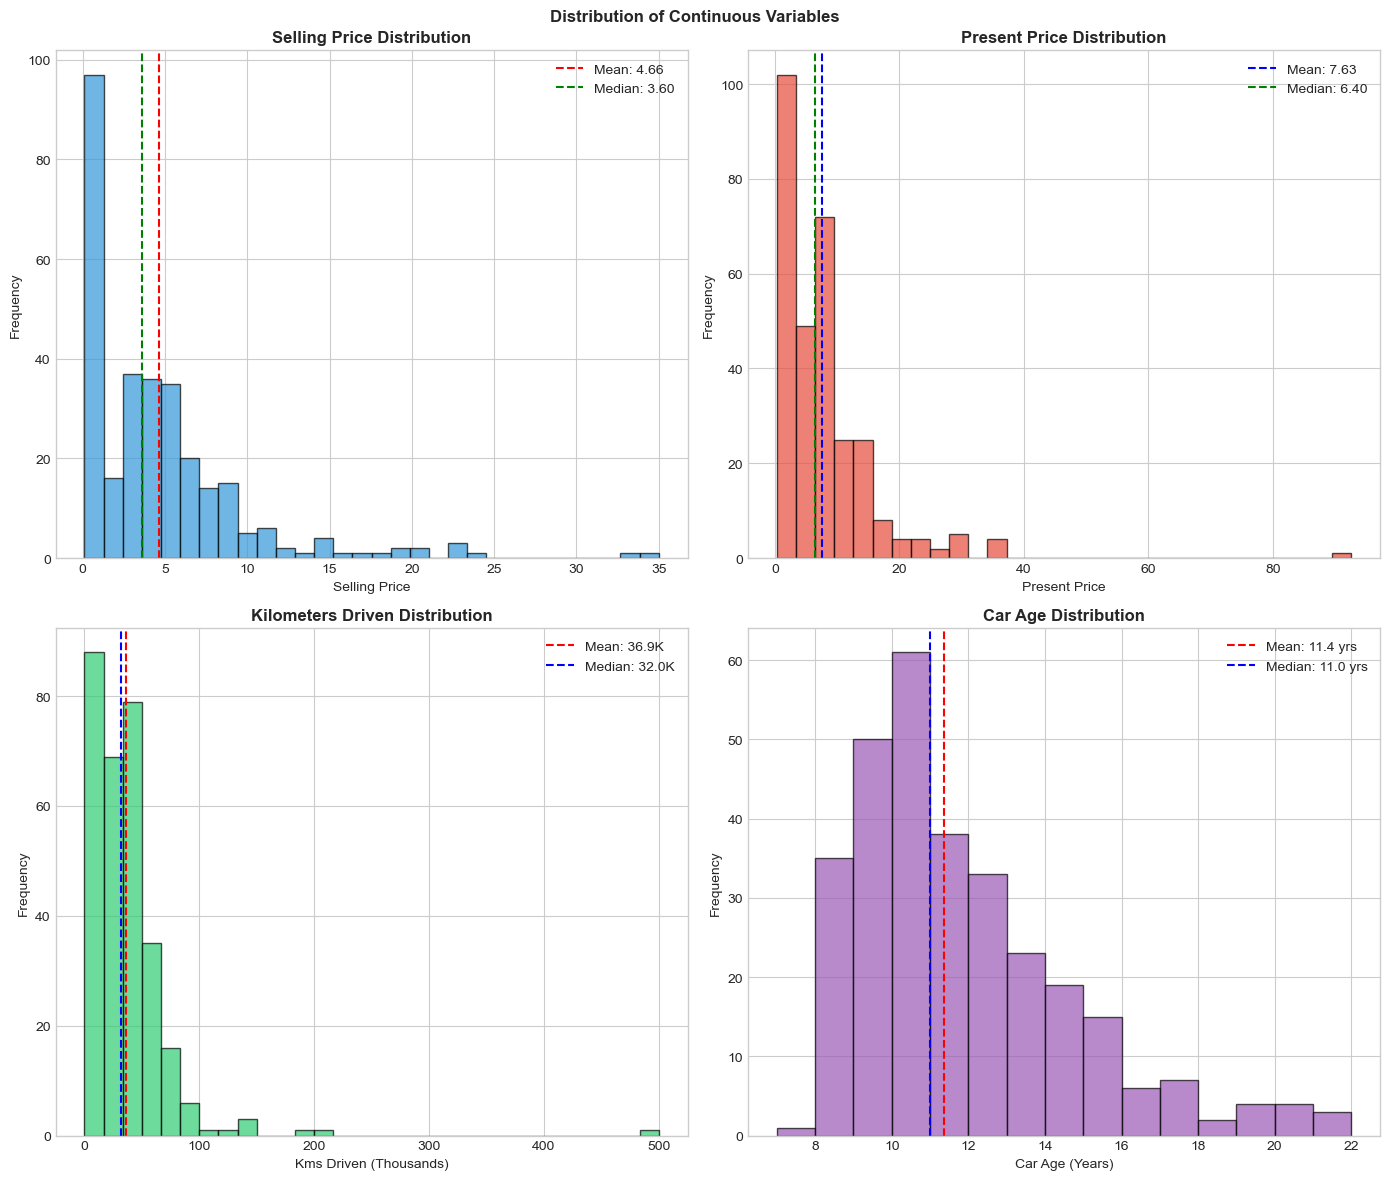

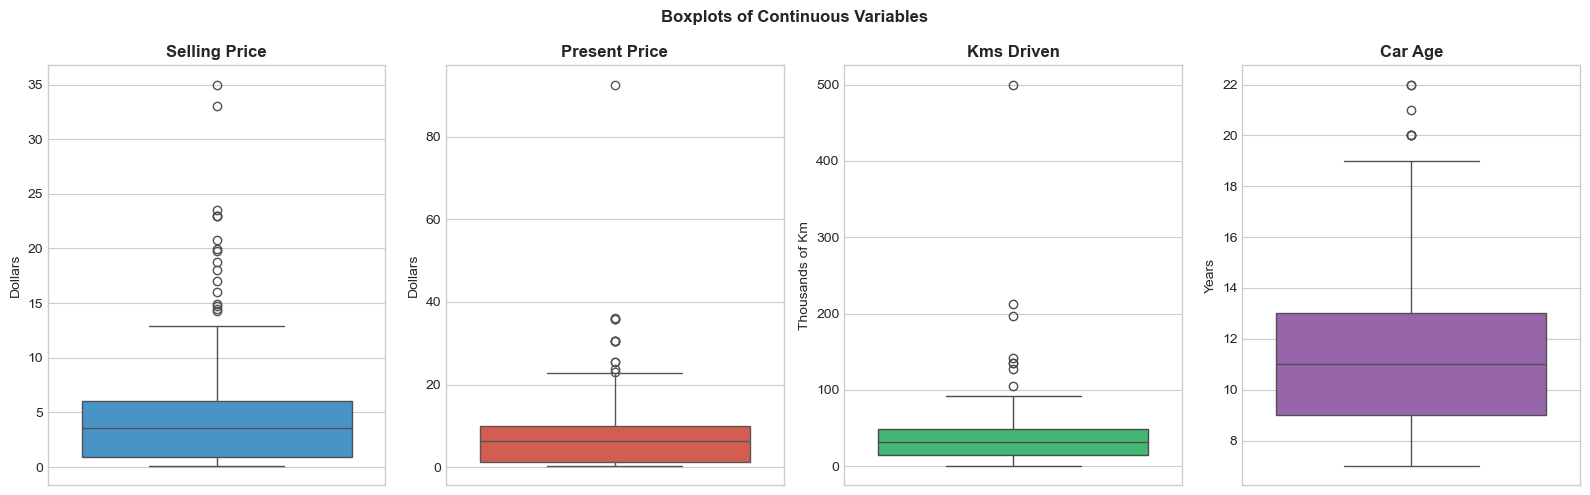

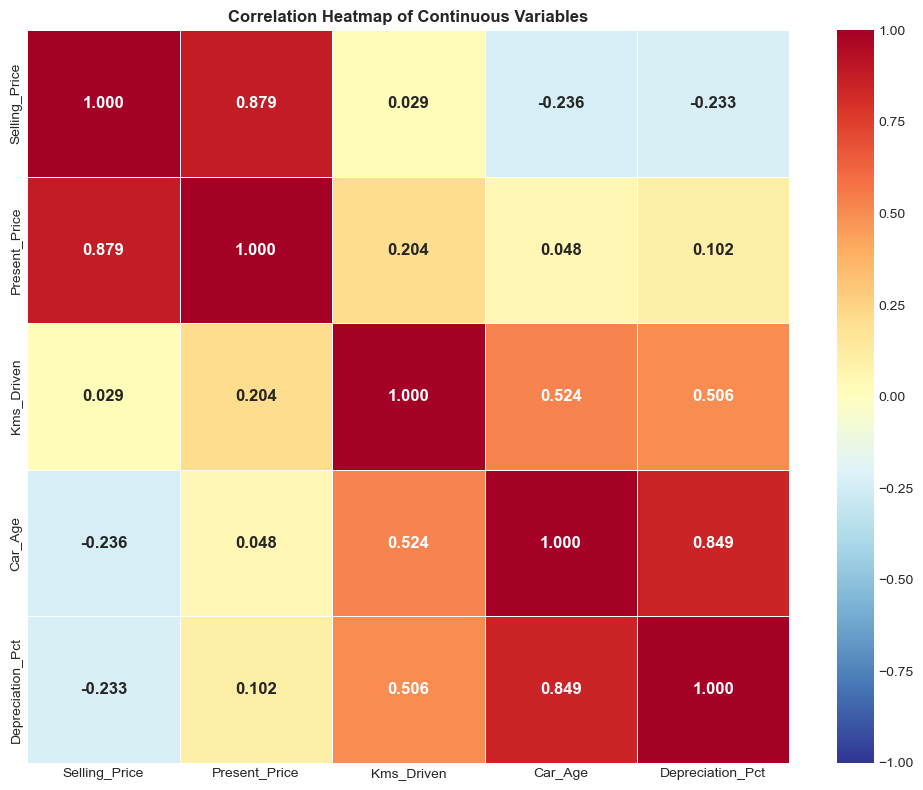

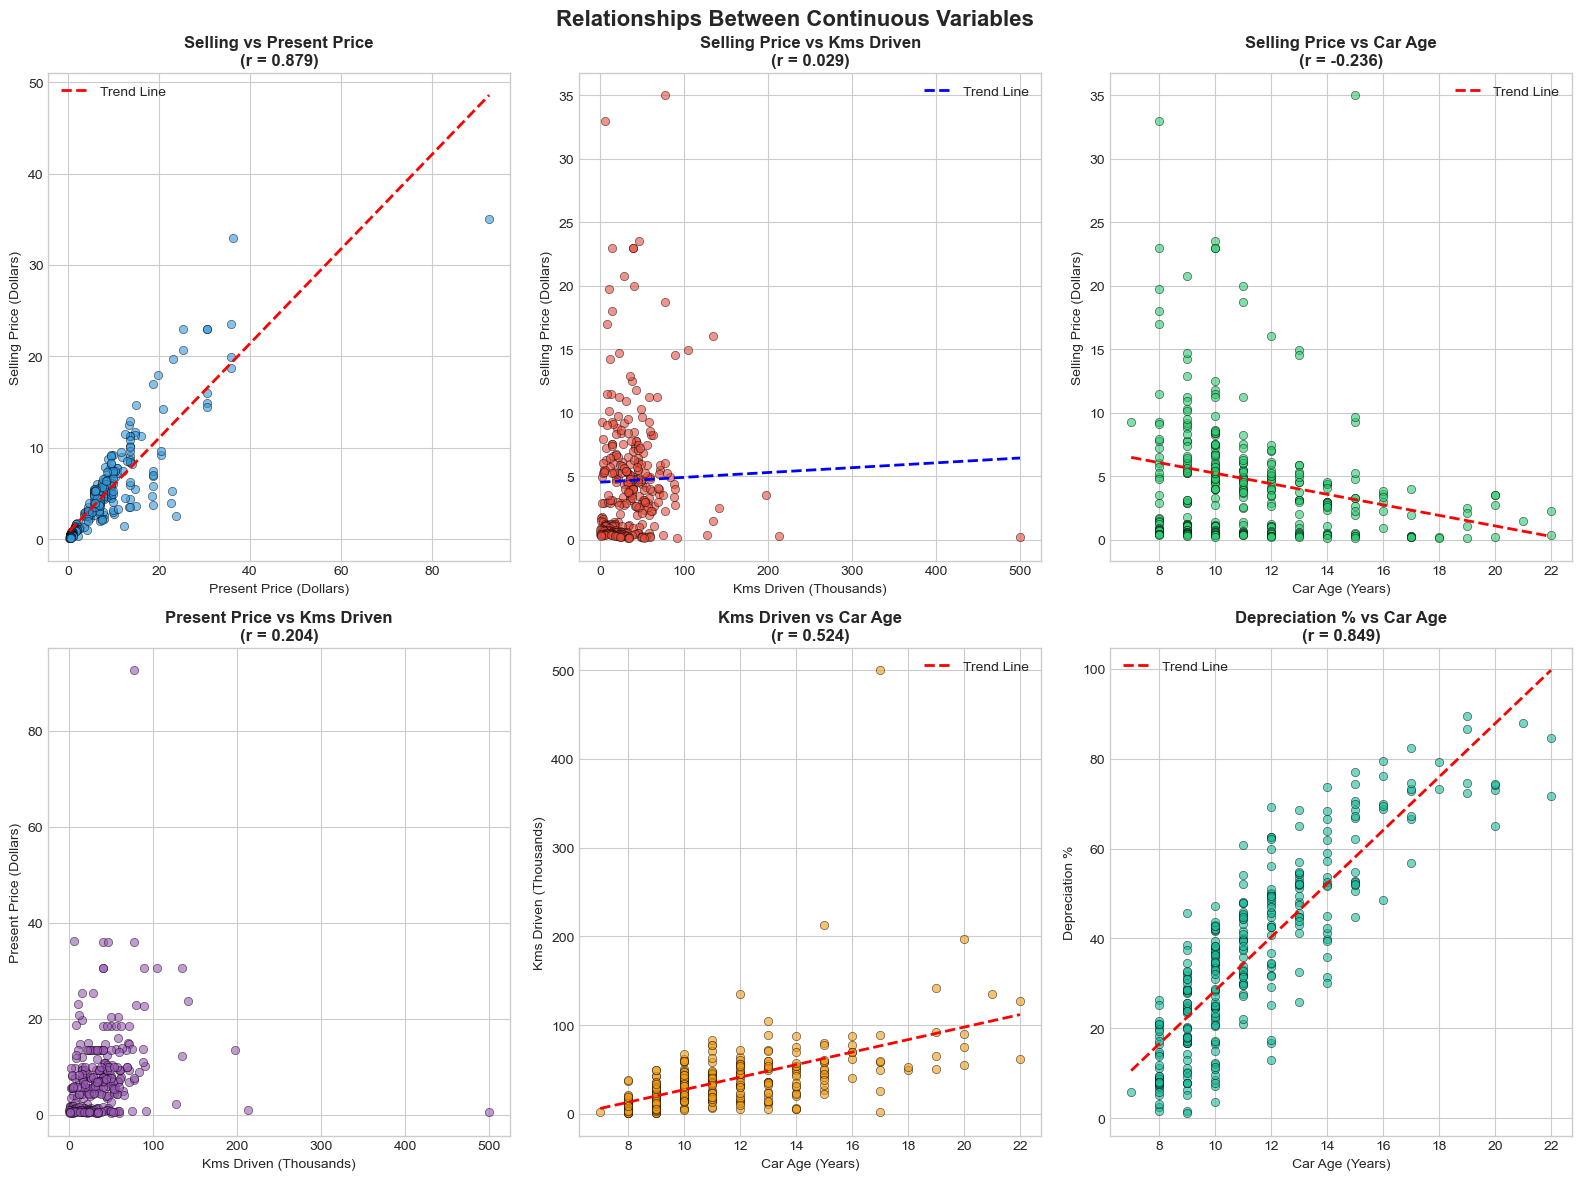

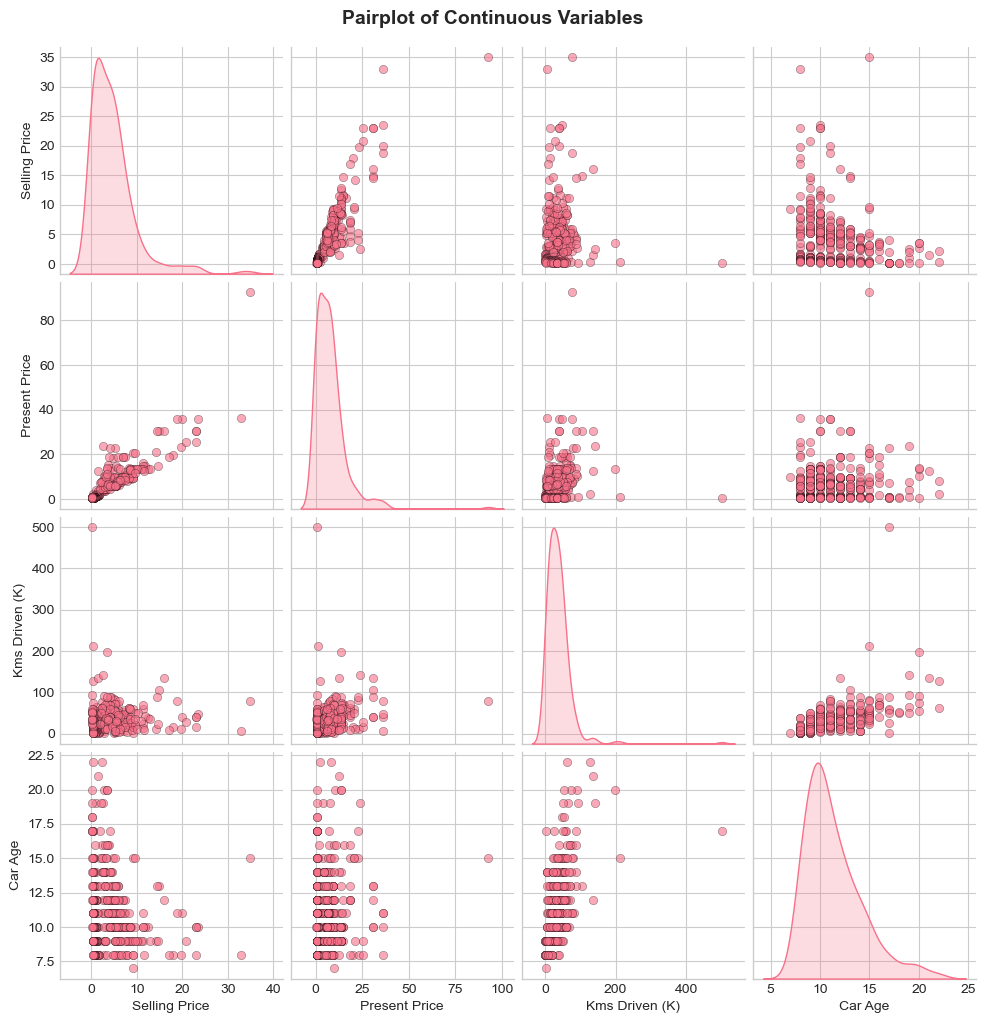

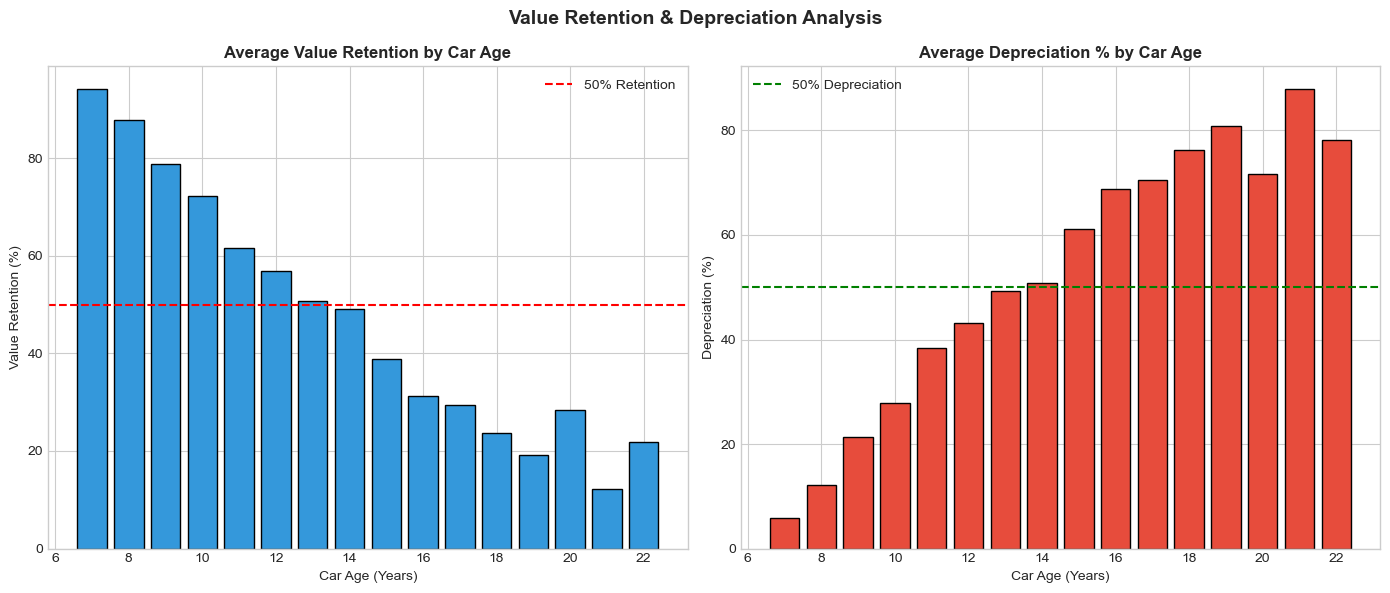

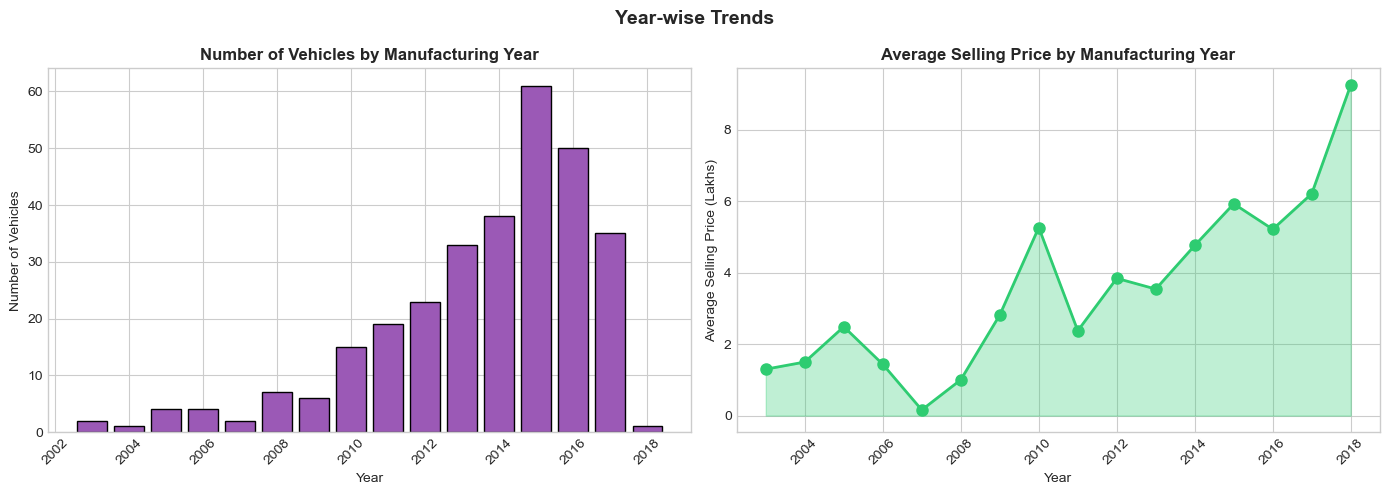

In [177]:
# 5. Conduct exploratory analysis for the continuous variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
cars_df = pd.read_csv('C:/Users/nghel/Downloads/car_data.csv')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Adding car age column
cars_df['Car_Age'] = 2025 - cars_df['Year']

# Scaling Kms_Driven to thousands for better comparison
cars_df['Kms_Driven_K'] = cars_df['Kms_Driven']/1000

print("="*80)
print("Exploratory Analysis of Continuous Variables")
print("="*80)

# Identifying Continuous Variables
print("\n" + "="*80)
print("1. Descriptive Statistics:")
print("="*80)

continuous_vars = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year', 'Car_Age']
print(f"\nContinuous Variables: {continuous_vars}")
print(f"Total records: {len(cars_df)}")

desc_stats = cars_df[continuous_vars].describe()
print("\nBasic Statistics:")
print(desc_stats.round(2))

# 1. Individual Variable Analysis
print("\n" + "="*80)
print("1. Individual Variable Analysis")
print("="*80)

# Selling Price Analysis
print("\n--- Selling Price ---")
print(f"Range: {cars_df['Selling_Price'].min()} to {cars_df['Selling_Price'].max()}")
print(f"Most common price range: {cars_df['Selling_Price'].mode().values[0]}")
price_bins = pd.cut(cars_df['Selling_Price'], bins=[0, 2, 5, 10, 20, 40], labels=['0-2', '2-5', '5-10', '10-20', '20+'])
print("\nPrice Distribution:")
print(price_bins.value_counts().sort_index())   

# Present Price Analysis 
print("\n---Present Price---")
print(f"Range: {cars_df['Present_Price'].min()} to {cars_df['Present_Price'].max()}")
print(f"Average: {cars_df['Present_Price'].mean():.2f}")

# KMs Driven Analysis
print("\n---KMs Driven---")
print(f"Range: {cars_df['Kms_Driven'].min():,} to {cars_df['Kms_Driven'].max():,}km")
print(f"Average: {cars_df['Kms_Driven'].mean():,.0f}km")
print(f"Median: {cars_df['Kms_Driven'].median():,.0f}km")
km_bins = pd.cut(cars_df['Kms_Driven'], bins=[0, 20000, 40000, 60000, 100000, 500000],
                 labels=['0-20K', '20-40K', '40-60K', '60-100K', '100K+'])
print("n\Kms Driven Distribution:")
print(km_bins.value_counts().sort_index())

# Year Analysis
print("\n---Year---")
print(f"Range: {cars_df['Year'].min()} to {cars_df['Year'].max()}")
print("\nVehicles by Year:")
print(cars_df['Year'].value_counts().sort_index())

# Car Age Analysis
print("\n---Car Age---")
print(f"Range: {cars_df['Car_Age'].min()} to {cars_df['Car_Age'].max()} years")
print(f"Average Age: {cars_df['Car_Age'].mean():.1f} years")
age_bins = pd.cut(cars_df['Car_Age'], bins = [0, 5, 10, 15, 25], labels=['0-5', '6-10', '11-15', '16+'])
print("\nAge Distribution:")
print(age_bins.value_counts().sort_index())

# 2. Correlation Analysis
print("\n" + "="*80)
print("2. Correlation Analysis")
print("="*80)

correlation_matrix = cars_df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

print("\nKey Correlations with Selling Price:")
for var in ['Present_Price', 'Kms_Driven', 'Car_Age']:
    corr = cars_df['Selling_Price'].corr(cars_df[var])
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr)>0.4 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f" {var}: {corr:.3f}({strength} {direction})")
      
# 3. Depreciation Analysis
print("\n" + "="*80)
print("3. Depreciation Analysis")
print("="*80)

cars_df['Depreciation'] = cars_df['Present_Price'] - cars_df['Selling_Price']
cars_df['Depreciation_Pct'] = (cars_df['Depreciation']/cars_df['Present_Price'])*100

print("\nDepreciation Statistics:")
print(f"Average Depreciation: {cars_df['Depreciation'].mean():.2f}")
print(f"Average Depreciation %: {cars_df['Depreciation_Pct'].mean():.1f}%")
print(f"Median Depreciation %: {cars_df['Depreciation_Pct'].median():.1f}%")

print("\nDepreciation by Car Age:")
dep_by_age = cars_df.groupby('Car_Age')['Depreciation_Pct'].mean().round(1)
print(dep_by_age)

# 4. Relationship Insights
print("\n" + "="*80)
print("4. Relationship Insights")
print("="*80)

# Price vs Age Relationship
print("\n---Selling Price by Car Age---")
price_by_age = cars_df.groupby('Car_Age')['Selling_Price'].agg(['mean', 'median', 'count']).round(2)
print(price_by_age)

# Price vs KMs Relationship
print("\n---Selling Price by KMs Driven Range ---")
cars_df['Kms_Range'] = pd.cut(cars_df['Kms_Driven'], bins = [0, 20000, 40000, 60000, 100000, 500000],
                              labels=['0-20k', '20-40K', '40-60K', '60-100K', '100K+'])
price_by_kms = cars_df.groupby('Kms_Range')['Selling_Price'].agg(['mean', 'median', 'count']).round(2)
print(price_by_kms)

# Present Price vs Selling Price
print("\n---Value Retention Analysis---")
cars_df['Value_Retention'] = (cars_df['Selling_Price']/cars_df['Present_Price'])*100
print(f"Average Value Retention: {cars_df['Value_Retention'].mean():.1f}%")
print(f"Median Value Retention: {cars_df['Value_Retention'].median():.1f}%")

print("\nValue Retention by Car Age:")
retention_by_age = cars_df.groupby('Car_Age')['Value_Retention'].mean().round(1)
print(retention_by_age)

# Creating Visualizations

# 1. Distribution of each continuous variable
fig, axes = plt.subplots(2, 2, figsize = (14,12))
fig.suptitle('Distribution of Continuous Variables', fontsize = 12, fontweight = 'bold')

# Selling Price Distribution
axes[0, 0].hist(cars_df['Selling_Price'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(cars_df['Selling_Price'].mean(), color='red', linestyle='--', label=f'Mean: {cars_df["Selling_Price"].mean():.2f}')
axes[0, 0].axvline(cars_df['Selling_Price'].median(), color='green', linestyle='--', label=f'Median: {cars_df["Selling_Price"].median():.2f}')
axes[0, 0].set_title('Selling Price Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Selling Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Present Price Distribution
axes[0, 1].hist(cars_df['Present_Price'], bins=30, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(cars_df['Present_Price'].mean(), color='blue', linestyle='--', label=f'Mean: {cars_df["Present_Price"].mean():.2f}')
axes[0, 1].axvline(cars_df['Present_Price'].median(), color='green', linestyle='--', label=f'Median: {cars_df["Present_Price"].median():.2f}')
axes[0, 1].set_title('Present Price Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Present Price')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# KMs Driven Distribution
axes[1, 0].hist(cars_df['Kms_Driven_K'], bins=30, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(cars_df['Kms_Driven_K'].mean(), color='red', linestyle='--', label=f'Mean: {cars_df["Kms_Driven_K"].mean():.1f}K')
axes[1, 0].axvline(cars_df['Kms_Driven_K'].median(), color='blue', linestyle='--', label=f'Median: {cars_df["Kms_Driven_K"].median():.1f}K')
axes[1, 0].set_title('Kilometers Driven Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Kms Driven (Thousands)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Car Age Distribution
axes[1, 1].hist(cars_df['Car_Age'], bins=15, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(cars_df['Car_Age'].mean(), color='red', linestyle='--', label=f'Mean: {cars_df["Car_Age"].mean():.1f} yrs')
axes[1, 1].axvline(cars_df['Car_Age'].median(), color='blue', linestyle='--', label=f'Median: {cars_df["Car_Age"].median():.1f} yrs')
axes[1, 1].set_title('Car Age Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Car Age (Years)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 2. Boxplots for continuous variables
fig, axes = plt.subplots(1,4, figsize = (16,5))
fig.suptitle('Boxplots of Continuous Variables', fontsize = 12, fontweight = 'bold')

sns.boxplot(y=cars_df['Selling_Price'], ax=axes[0], color='#3498db')
axes[0].set_title('Selling Price', fontweight='bold')
axes[0].set_ylabel('Dollars')

sns.boxplot(y=cars_df['Present_Price'], ax=axes[1], color='#e74c3c')
axes[1].set_title('Present Price', fontweight='bold')
axes[1].set_ylabel('Dollars')

sns.boxplot(y=cars_df['Kms_Driven_K'], ax=axes[2], color='#2ecc71')
axes[2].set_title('Kms Driven', fontweight='bold')
axes[2].set_ylabel('Thousands of Km')

sns.boxplot(y=cars_df['Car_Age'], ax=axes[3], color='#9b59b6')
axes[3].set_title('Car Age', fontweight='bold')
axes[3].set_ylabel('Years')
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = cars_df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age', 'Depreciation_Pct']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.3f', linewidths=0.5, ax=ax, vmin=-1, vmax=1,
            annot_kws={'size': 12, 'fontweight': 'bold'})
ax.set_title('Correlation Heatmap of Continuous Variables', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Scatter plots - analyzing relationships between variables
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle('Relationships Between Continuous Variables', fontsize=16, fontweight='bold')

# Selling Price vs Present Price
axes[0, 0].scatter(cars_df['Present_Price'], cars_df['Selling_Price'], alpha=0.6, c='#3498db', edgecolors='black', linewidth=0.5)
z = np.polyfit(cars_df['Present_Price'], cars_df['Selling_Price'], 1)
p = np.poly1d(z)
axes[0, 0].plot(cars_df['Present_Price'].sort_values(), p(cars_df['Present_Price'].sort_values()), "r--", linewidth=2, label='Trend Line')
axes[0, 0].set_xlabel('Present Price (Dollars)')
axes[0, 0].set_ylabel('Selling Price (Dollars)')
axes[0, 0].set_title(f'Selling vs Present Price\n(r = {cars_df["Selling_Price"].corr(cars_df["Present_Price"]):.3f})', fontweight='bold')
axes[0, 0].legend()

# Selling Price vs KMs Driven
axes[0, 1].scatter(cars_df['Kms_Driven_K'], cars_df['Selling_Price'], alpha=0.6, c='#e74c3c', edgecolors='black', linewidth=0.5)
z = np.polyfit(cars_df['Kms_Driven_K'], cars_df['Selling_Price'], 1)
p = np.poly1d(z)
axes[0, 1].plot(cars_df['Kms_Driven_K'].sort_values(), p(cars_df['Kms_Driven_K'].sort_values()), "b--", linewidth=2, label='Trend Line')
axes[0, 1].set_xlabel('Kms Driven (Thousands)')
axes[0, 1].set_ylabel('Selling Price (Dollars)')
axes[0, 1].set_title(f'Selling Price vs Kms Driven\n(r = {cars_df["Selling_Price"].corr(cars_df["Kms_Driven"]):.3f})', fontweight='bold')
axes[0, 1].legend()

# Selling Price vs Car Age
axes[0, 2].scatter(cars_df['Car_Age'], cars_df['Selling_Price'], alpha=0.6, c='#2ecc71', edgecolors='black', linewidth=0.5)
z = np.polyfit(cars_df['Car_Age'], cars_df['Selling_Price'], 1)
p = np.poly1d(z)
axes[0, 2].plot(cars_df['Car_Age'].sort_values(), p(cars_df['Car_Age'].sort_values()), "r--", linewidth=2, label='Trend Line')
axes[0, 2].set_xlabel('Car Age (Years)')
axes[0, 2].set_ylabel('Selling Price (Dollars)')
axes[0, 2].set_title(f'Selling Price vs Car Age\n(r = {cars_df["Selling_Price"].corr(cars_df["Car_Age"]):.3f})', fontweight='bold')
axes[0, 2].legend()

# Present Price vs KMs Driven
axes[1, 0].scatter(cars_df['Kms_Driven_K'], cars_df['Present_Price'], alpha=0.6, c='#9b59b6', edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Kms Driven (Thousands)')
axes[1, 0].set_ylabel('Present Price (Dollars)')
axes[1, 0].set_title(f'Present Price vs Kms Driven\n(r = {cars_df["Present_Price"].corr(cars_df["Kms_Driven"]):.3f})', fontweight='bold')

# KMs Driven vs Car Age
axes[1, 1].scatter(cars_df['Car_Age'], cars_df['Kms_Driven_K'], alpha=0.6, c='#f39c12', edgecolors='black', linewidth=0.5)
z = np.polyfit(cars_df['Car_Age'], cars_df['Kms_Driven_K'], 1)
p = np.poly1d(z)
axes[1, 1].plot(cars_df['Car_Age'].sort_values(), p(cars_df['Car_Age'].sort_values()), "r--", linewidth=2, label='Trend Line')
axes[1, 1].set_xlabel('Car Age (Years)')
axes[1, 1].set_ylabel('Kms Driven (Thousands)')
axes[1, 1].set_title(f'Kms Driven vs Car Age\n(r = {cars_df["Kms_Driven"].corr(cars_df["Car_Age"]):.3f})', fontweight='bold')
axes[1, 1].legend()

# Depreciation % vs Car Age
axes[1, 2].scatter(cars_df['Car_Age'], cars_df['Depreciation_Pct'], alpha=0.6, c='#1abc9c', edgecolors='black', linewidth=0.5)
z = np.polyfit(cars_df['Car_Age'], cars_df['Depreciation_Pct'], 1)
p = np.poly1d(z)
axes[1, 2].plot(cars_df['Car_Age'].sort_values(), p(cars_df['Car_Age'].sort_values()), "r--", linewidth=2, label='Trend Line')
axes[1, 2].set_xlabel('Car Age (Years)')
axes[1, 2].set_ylabel('Depreciation %')
axes[1, 2].set_title(f'Depreciation % vs Car Age\n(r = {cars_df["Depreciation_Pct"].corr(cars_df["Car_Age"]):.3f})', fontweight='bold')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# 5. Pairplot for continuous variables
pairplot_df = cars_df[['Selling_Price', 'Present_Price', 'Kms_Driven_K', 'Car_Age']].copy()
pairplot_df.columns = ['Selling Price', 'Present Price', 'Kms Driven (K)', 'Car Age']
g = sns.pairplot(pairplot_df, diag_kind='kde', plot_kws={'alpha': 0.6, 'edgecolor': 'black', 'linewidth': 0.3},
                 diag_kws={'fill': True})
g.fig.suptitle('Pairplot of Continuous Variables', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# 6. Value Retention and Depreciation Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Value Retention & Depreciation Analysis', fontsize=14, fontweight='bold')

# Value Retention by Age
retention_by_age = cars_df.groupby('Car_Age')['Value_Retention'].mean()
axes[0].bar(retention_by_age.index, retention_by_age.values, color='#3498db', edgecolor='black')
axes[0].axhline(y=50, color='red', linestyle='--', label='50% Retention')
axes[0].set_xlabel('Car Age (Years)')
axes[0].set_ylabel('Value Retention (%)')
axes[0].set_title('Average Value Retention by Car Age', fontweight='bold')
axes[0].legend()

# Depreciation by Age
dep_by_age = cars_df.groupby('Car_Age')['Depreciation_Pct'].mean()
axes[1].bar(dep_by_age.index, dep_by_age.values, color='#e74c3c', edgecolor='black')
axes[1].axhline(y=50, color='green', linestyle='--', label='50% Depreciation')
axes[1].set_xlabel('Car Age (Years)')
axes[1].set_ylabel('Depreciation (%)')
axes[1].set_title('Average Depreciation % by Car Age', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

# 7. Year-Wise Trends
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Year-wise Trends', fontsize=14, fontweight='bold')

# Count by Year
year_counts = cars_df['Year'].value_counts().sort_index()
axes[0].bar(year_counts.index, year_counts.values, color='#9b59b6', edgecolor='black')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Vehicles')
axes[0].set_title('Number of Vehicles by Manufacturing Year', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Average Selling Price by Year
price_by_year = cars_df.groupby('Year')['Selling_Price'].mean()
axes[1].plot(price_by_year.index, price_by_year.values, marker='o', linewidth=2, markersize=8, color='#2ecc71')
axes[1].fill_between(price_by_year.index, price_by_year.values, alpha=0.3, color='#2ecc71')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Selling Price (Lakhs)')
axes[1].set_title('Average Selling Price by Manufacturing Year', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 5. Key Findings

# 1) Continuous Variables Analysis

# Selling Price:
# Range: 0.10 to 35.00 Dollars 
# Mean: 4.66 dollars | Median: 3.60 dollars
# Most vehicles were priced between 2-5

# Present Price:
# Range: 0.32 to 92.60 Dollars
# Mean: 7.63 | Median: 6.40
# 19 outliers (mainly luxury vehicles like Land Cruiser, Fortuner)

# KMs Driven
# Range: 500 to 500000 km
# Mean: 34947 km | Median: 32000km
# Most vehicles driven 20000-60000 km
# 17 outliers with extremely high mileage

# Car Age 
# Range: 7-22 years (relative to 2025)
# Mean: 11.4 years 
# Most vehicles are 6-15 years old

# 2) Key Correlations

# Selling Price vs Present Price: r = 0.879 (strong, positive)
# Higher original prices is associated with a higher resale value

# Selling Price vs Car Age: r = -0.236 (weak, negative)
# Older cars sell for less (due to depreciation)

# Selling Price vs KMs Driven: r = -0.029 (very week, negative)
# Mileage has little impact on price

# KMs Driven vs Car Age: r = 0.523 (moderate, positive)
# Older cars are associated with more mileage

# Depreciation % vs Car Age: r = 0.496 (moderate, positive)
# Older vehicles have lost more value

# 3) Depreciation Analysis
# Average Depreciation: 39.0% of original value
# Vehicles lose approx. 50% value by 12-13 years
# Steepest depreciation in first 6-8 years
# Premium vehicles retain value better

# 4) Year-Wise Trends
# most vehicles in dataset from 2013-2017
# 2018 vehicles have highest average selling price
# Newer vehicles fetch higher prices
# Few vehicles from 2003-2008

In [ ]:
# 6. Based on the insights identified, state a hypothesis which you can test with a regression model

# Hypothesis: Present price is the most significant predictor of selling price and has more explanatory power than age or mileage. 
# Rationale: Correlation analysis showed r = 0.879 between present price and selling price, whereas KMs Driven showed almost no correlation (r = 0.029)


Multiple  Linear Regression Model
Hypothesis: Present price is the strongest predictor of selling price

Features available for modeling:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Kms_Driven_k', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']

Target Variable: Selling_Price
Features: ['Present_Price', 'Car_Age', 'Kms_Driven_k', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']

Dataset size: 301 records

2. TRAIN-TEST SPLIT
Training set size: 240 (79.7%)
Test set size: 61 (20.3%)

Model Building using StatsModels

FULL REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     259.0
Date:       

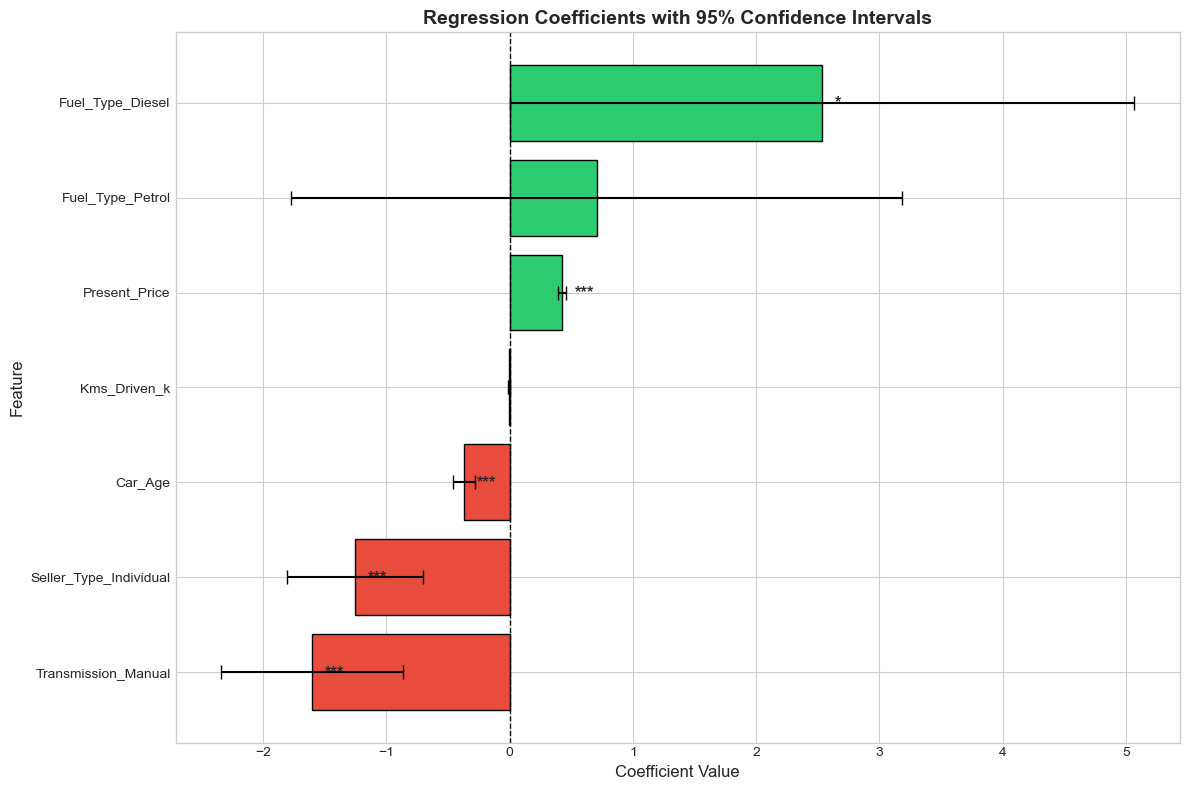


Feature Importance (by absolute standardized coefficient):
               Feature  Standardized_Coef  Original_Coef
         Present_Price           3.829687       0.426801
               Car_Age           1.063882      -0.369558
      Fuel_Type_Diesel           0.989393       2.534874
Seller_Type_Individual           0.600966      -1.253290
   Transmission_Manual           0.529307      -1.600474
      Fuel_Type_Petrol           0.280276       0.706269
          Kms_Driven_k           0.254741      -0.006099


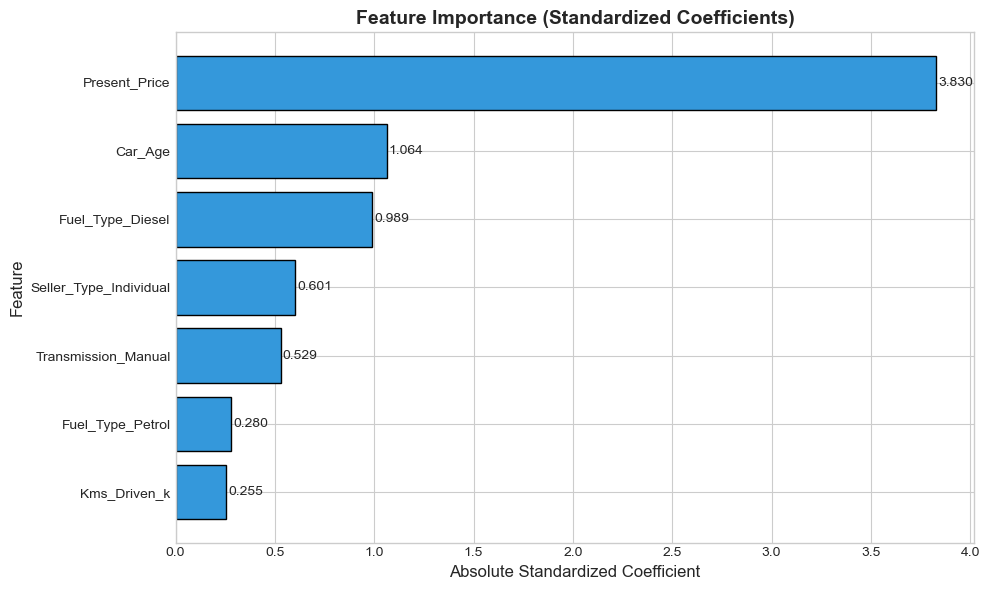

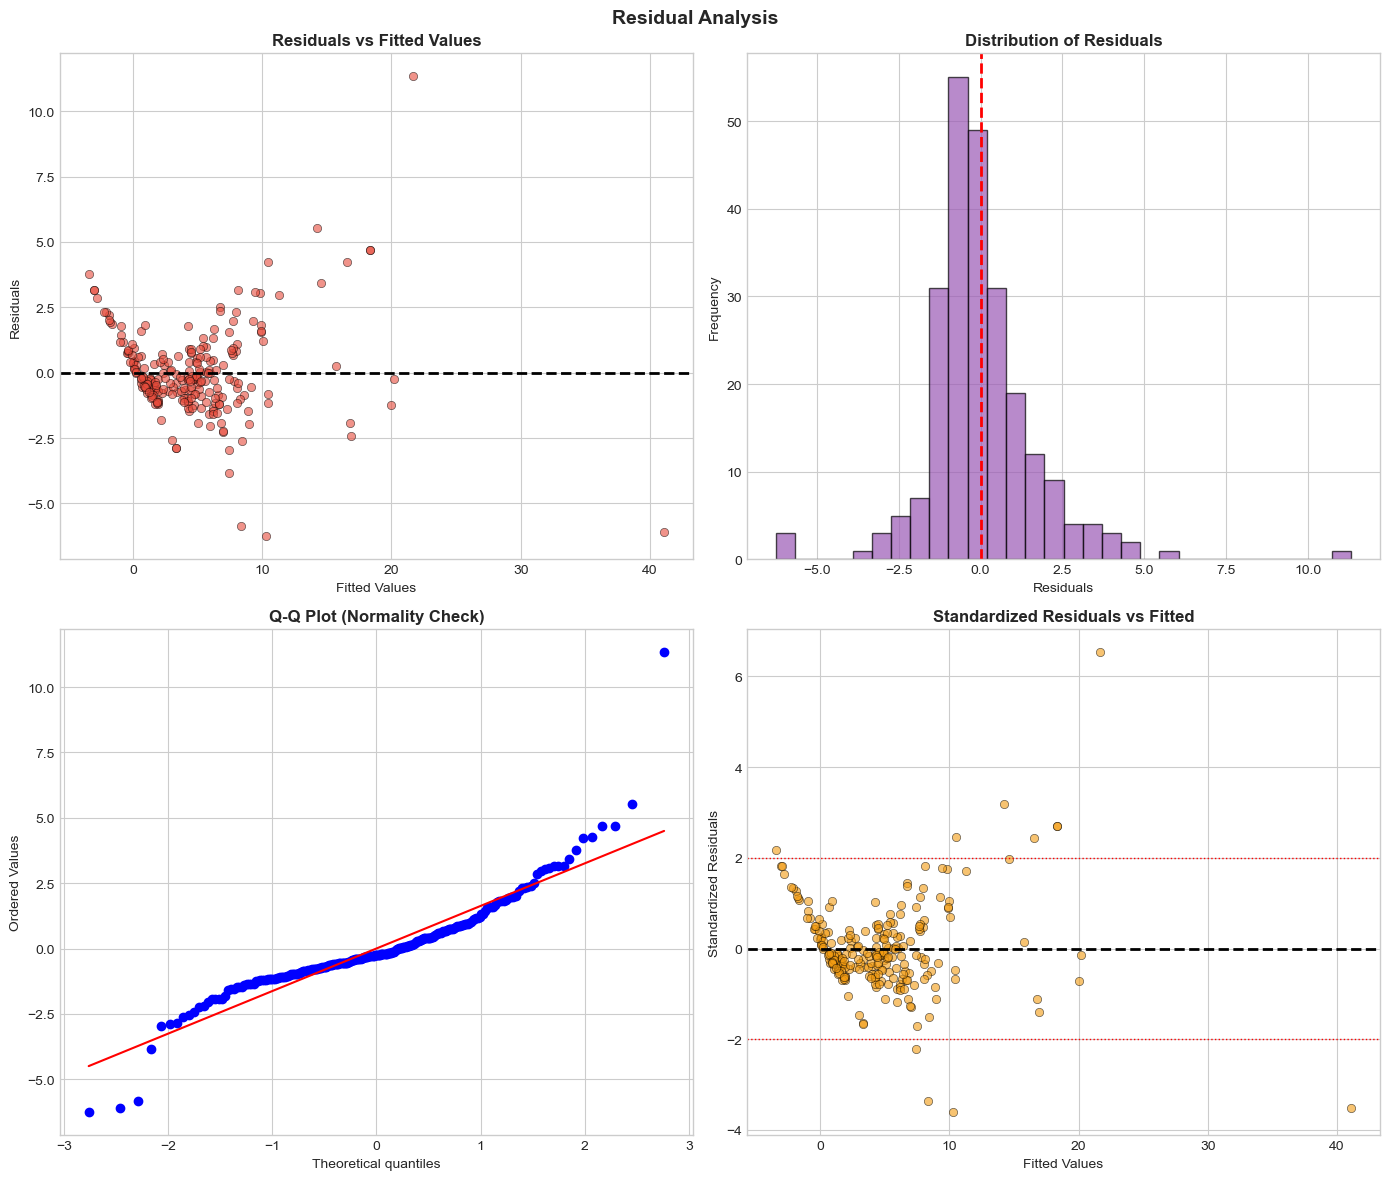

In [203]:
# 7. Build a linear regression model based on your hypothesis. Interpret the results.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
cars_df = pd.read_csv('C:/Users/nghel/Downloads/car_data.csv')

plt.style.use('seaborn-v0_8-whitegrid')

print("="*80)
print("Multiple  Linear Regression Model")
print("Hypothesis: Present price is the strongest predictor of selling price")
print("="*80)

# Data Preparation

# Create Car_Age
cars_df['Car_Age'] = 2025 - cars_df['Year']

# Scale Kms_Driven to thousands
cars_df['Kms_Driven_k'] = cars_df['Kms_Driven']/1000

# Creating dummy variables for categorical variables
df_model = pd.get_dummies(cars_df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
print("\nFeatures available for modeling:")
print(df_model.columns.tolist())

# Define features and target using present_price, Car_Age, Kms_Driven_k, and categorical dummies
feature_cols = ['Present_Price', 'Car_Age', 'Kms_Driven_k', 
                'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
                'Seller_Type_Individual', 'Transmission_Manual']

X = df_model[feature_cols].astype(float)
y = df_model['Selling_Price'].astype(float)

print(f"\nTarget Variable: Selling_Price")
print(f"Features: {feature_cols}")
print(f"\nDataset size: {len(cars_df)} records")

# Train-Test Split
print("\n" + "="*80)
print("2. TRAIN-TEST SPLIT")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} ({len(X_train)/len(cars_df)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(cars_df)*100:.1f}%)")

# Build model

print("\n" + "="*80)
print("Model Building using StatsModels")
print("="*80)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm).fit()

print("\n" + "="*80)
print("FULL REGRESSION RESULTS")
print("="*80)
print(model_sm.summary())

# Coefficient Interpretation
print("\n" + "="*80)
print("Coefficient Interpretation")
print("="*80)

# Get coefficients with confidence intervals
coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + feature_cols,
    'Coefficient': model_sm.params.values,  # Use statsmodels params instead
    'Std Error': model_sm.bse.values,
    't-statistic': model_sm.tvalues.values,
    'P-value': model_sm.pvalues.values,
    'CI Lower': model_sm.conf_int()[0].values,
    'CI Upper': model_sm.conf_int()[1].values
})

coef_df['Significant'] = coef_df['P-value'].apply(lambda x: '***' if x < 0.001 else '**' if x < 0.01 else '*' if x < 0.05 else '')

print("\nCoefficient Summary:")
print("-" * 100)
pd.set_option('display.width', 120)
print(coef_df.to_string(index=False))
print("-" * 100)
print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05")

# Creating coefficient plot
fig, ax = plt.subplots(figsize=(12, 8))

# Exclude intercept for visualization
coef_plot = coef_df[coef_df['Feature'] != 'Intercept'].copy()
coef_plot = coef_plot.sort_values('Coefficient')

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in coef_plot['Coefficient']]
bars = ax.barh(coef_plot['Feature'], coef_plot['Coefficient'], color=colors, edgecolor='black')

# Add error bars (confidence intervals)
ax.errorbar(coef_plot['Coefficient'], coef_plot['Feature'], 
            xerr=[coef_plot['Coefficient'] - coef_plot['CI Lower'], 
                  coef_plot['CI Upper'] - coef_plot['Coefficient']], 
            fmt='none', color='black', capsize=5)

ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.set_title('Regression Coefficients with 95% Confidence Intervals', fontsize=14, fontweight='bold')

# Add significance markers
for i, (idx, row) in enumerate(coef_plot.iterrows()):
    if row['Significant']:
        ax.text(row['Coefficient'] + 0.1, i, row['Significant'], va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Feature Importance 
# Fit sklearn model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Standardize features to compare importance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Standardized_Coef': np.abs(model_scaled.coef_),
    'Original_Coef': model_sklearn.coef_
}).sort_values('Standardized_Coef', ascending=False)

print("\nFeature Importance (by absolute standardized coefficient):")
print(importance_df.to_string(index=False))

# Feature Importance Plot
fig, ax = plt.subplots(figsize=(10, 6))

importance_sorted = importance_df.sort_values('Standardized_Coef', ascending=True)
bars = ax.barh(importance_sorted['Feature'], importance_sorted['Standardized_Coef'], 
               color='#3498db', edgecolor='black')
ax.set_xlabel('Absolute Standardized Coefficient', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.set_title('Feature Importance (Standardized Coefficients)', fontsize=14, fontweight='bold')

# Add values on bars
for bar, val in zip(bars, importance_sorted['Standardized_Coef']):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Residual Analysis
y_train_pred = model_sklearn.predict(X_train)
y_test_pred = model_sklearn.predict(X_test)

# Calculate residuals
residuals = y_train - y_train_pred
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Residual Analysis', fontsize=14, fontweight='bold')

# Residuals vs Fitted
axes[0, 0].scatter(y_train_pred, residuals, alpha=0.6, color='#e74c3c', edgecolors='black', linewidth=0.5)
axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values', fontweight='bold')

# Histogram of Residuals
axes[0, 1].hist(residuals, bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals', fontweight='bold')

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)', fontweight='bold')

# Standardized Residuals vs Fitted
axes[1, 1].scatter(y_train_pred, standardized_residuals, alpha=0.6, color='#f39c12', edgecolors='black', linewidth=0.5)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 1].axhline(y=2, color='red', linestyle=':', linewidth=1)
axes[1, 1].axhline(y=-2, color='red', linestyle=':', linewidth=1)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Standardized Residuals')
axes[1, 1].set_title('Standardized Residuals vs Fitted', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# 7 Interpret the results
# Hypothesis was confirmed, present price has a standardized coefficient of 3.830 which is the strongest predictor (second strong predictor was car age at 1.064)
# KMs driven was not statistically significant (p = 0.067)


In [ ]:
# 8 How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

# The residual analysis demonstrated some extreme outliers (premium vehicles). To handle outliers, we could:
# Remove outliers beyond 3 standard deviations
# Try non-linear transformations on Selling_Price to reduce skewness
